In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("G20_Economic_Indicators.csv")
df.head()

Country Name Country Code                              Series Name  \
0    Argentina          ARG                        GDP (current US$)   
1    Argentina          ARG                    GDP growth (annual %)   
2    Argentina          ARG       GNI per capita (constant 2015 US$)   
3    Argentina          ARG         GDP per capita growth (annual %)   
4    Argentina          ARG  Life expectancy at birth, total (years)   

         Series Code      2000 [YR2000]      2001 [YR2001]      2002 [YR2002]  \
0     NY.GDP.MKTP.CD       284203750000       268696750000   97724004251.8602   
1  NY.GDP.MKTP.KD.ZG  -0.78899893905691  -4.40883968258557  -10.8944848285903   
2     NY.GNP.PCAP.KD   10407.6613660534   9818.95240543895   8431.41397302142   
3  NY.GDP.PCAP.KD.ZG  -1.90698749835167  -5.45379697848054  -11.8459503938227   
4     SP.DYN.LE00.IN             73.926             74.186             74.408   

      2003 [YR2003]     2004 [YR2004]     2005 [YR2005]  ...  \
0  127586973492.177  164657930452.787  198737095012.282  ...   
1  8.83704079576924  9.02957330068152  8.85165992013437  ...   
2  9196.09222734599  9200.53986553681   9895.5147348447  ...   
3  7.71922963663721  7.92815705080419  7.73249699851691  ...   
4             74.08            74.855            75.139  ...   

       2014 [YR2014]     2015 [YR2015]      2016 [YR2016]     2017 [YR2017]  \
0   526319673731.638  594749285413.212   557532320662.955  643628393281.364   
1  -2.51261532081394  2.73115982828944  -2.08032784377811  2.81850297775918   
2   13288.6704323099  13530.9262760371   13062.1352296832  13236.1795314936   
3  -3.57858050983289  1.62966427946263  -3.11006389821465  1.75764818265694   
4             76.755             76.76             76.308            76.833   

       2018 [YR2018]      2019 [YR2019]      2020 [YR2020]     2021 [YR2021]  \
0   524819892360.176   447754683615.225   385740508436.965  487902572164.348   
1  -2.61739646282038  -2.00086100285785   -9.9004848136464  10.7180099337095   
2   12619.2035743605   12206.1988385649   11038.2418825806  12186.8350395052   
3  -3.60160975657155  -2.96956249866219  -10.7702732277494  9.67392093465429   
4             76.999             77.284             75.892             75.39   

      2022 [YR2022]      2023 [YR2023]  
0  631133384439.944   640591410663.883  
1  4.95636996008236  -1.55050153620256  
2  12685.8612212206   12337.2179846545  
3  3.98913108450517   -2.4362511141417  
4            76.064                 ..  

[5 rows x 28 columns]

This format is not good for data analysis, therefore we will change it by using the melt function

First of all, let's identify the important columns:-

i) Country Name

ii) Series Name

The years which we have as columns can be used better as rows for data analysis

Let us first rename the columns

In [3]:
df = df.rename(columns={"Country Name":"country", "Series Name":"series_name"})
df.columns

Index(['country', 'Country Code', 'series_name', 'Series Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
      dtype='object')

Let's make a list to store all the years

In [4]:
years = list(df.columns)
years = years[4:]
print(years)

['2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']


Now let's make a new dataframe from the existing df

In [5]:
df_melted = pd.melt(df, id_vars=['country', 'series_name'], 
                    var_name='year', value_name='value', 
                    value_vars=years)
df_melted.head()

country                              series_name           year  \
0  Argentina                        GDP (current US$)  2000 [YR2000]   
1  Argentina                    GDP growth (annual %)  2000 [YR2000]   
2  Argentina       GNI per capita (constant 2015 US$)  2000 [YR2000]   
3  Argentina         GDP per capita growth (annual %)  2000 [YR2000]   
4  Argentina  Life expectancy at birth, total (years)  2000 [YR2000]   

               value  
0       284203750000  
1  -0.78899893905691  
2   10407.6613660534  
3  -1.90698749835167  
4             73.926

In [6]:
df_melted.shape

(8280, 4)

In [7]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      8208 non-null   object
 1   series_name  8160 non-null   object
 2   year         8280 non-null   object
 3   value        8160 non-null   object
dtypes: object(4)
memory usage: 258.9+ KB


The value column should have had a float value but it has an object value, let's try type conversion

In [8]:
try:
    df_melted.value = df_melted['value'].astype(float)
    print("Data type changed successfully")
except Exception as e:
    print(e)

could not convert string to float: '..'


It means that there are some values in the dataset  which have '..' as value

In [9]:
df_melted.replace('..', np.nan, inplace=True)

In [10]:
try:
    df_melted.value = df_melted['value'].astype(float)
    print("Value converted to float")
except Exception as e:
    print(e)

Value converted to float


In [11]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      8208 non-null   object 
 1   series_name  8160 non-null   object 
 2   year         8280 non-null   object 
 3   value        7081 non-null   float64
dtypes: float64(1), object(3)
memory usage: 258.9+ KB


In [12]:
(df_melted.isnull().sum()/len(df_melted))*100

country         0.869565
series_name     1.449275
year            0.000000
value          14.480676
dtype: float64

The value column has more than 14% null values so we will impute the values in it, whereas the other three columns have very less null values so we will just drop them

In [13]:
skewness = df_melted.value.skew()
print(skewness)

10.21205865770351


In [14]:
%matplotlib inline

The skewness indicates that the data is highly skewed to the right, let's also try visualizing

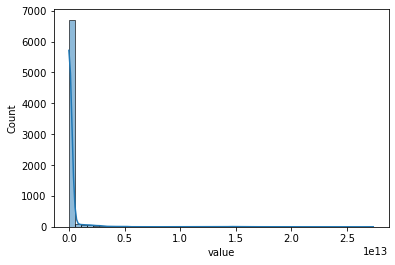

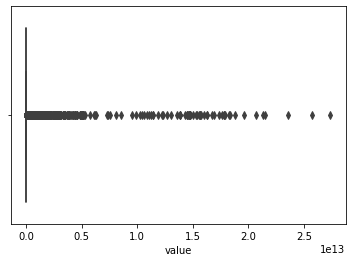

In [15]:
sns.histplot(df_melted['value'].dropna(), bins=50, kde=True)
plt.show()

sns.boxplot(x=df_melted['value'].dropna())
plt.show()

The following graphs show a skewness to the right, therefore we will impute value with median values

In [16]:
df_melted.value.fillna(df_melted.value.median(), inplace=True)

In [17]:
df_melted.dropna(inplace=True)

In [18]:
(df_melted.isnull().sum()/len(df_melted))*100

country        0.0
series_name    0.0
year           0.0
value          0.0
dtype: float64

Now let's try dealing with any outliers

In [19]:
from scipy import stats

In [20]:
df_melted_numeric = df_melted.select_dtypes(include=["float"])
z_scores = np.abs(stats.zscore(df_melted_numeric))
z_scores

value
0     0.065202
1     0.138074
2     0.138074
3     0.138074
4     0.138074
...        ...
8270  0.138074
8271  0.138074
8272  0.138074
8273  0.138074
8274  0.138074

[8160 rows x 1 columns]

Let's count the number of rows with z_score > 3

In [21]:
z_scores_3 = z_scores[z_scores.value>3]
indices = list(z_scores_3.index)
print(indices)
print(f"Percentage of outliers: {len(indices)/len(z_scores)*100}")

[170, 306, 323, 651, 668, 996, 1013, 1205, 1341, 1358, 1550, 1686, 1703, 1895, 2031, 2048, 2240, 2376, 2393, 2585, 2721, 2738, 2828, 2930, 3066, 3083, 3173, 3275, 3411, 3428, 3518, 3620, 3756, 3773, 3863, 3965, 4101, 4118, 4208, 4310, 4446, 4463, 4553, 4655, 4791, 4808, 4898, 5000, 5136, 5153, 5243, 5345, 5481, 5498, 5588, 5690, 5826, 5843, 5933, 6035, 6171, 6188, 6278, 6380, 6516, 6533, 6623, 6725, 6861, 6878, 6968, 7070, 7206, 7223, 7313, 7415, 7551, 7568, 7658, 7896, 7913, 8003, 8037, 8241, 8258]
Percentage of outliers: 1.0416666666666665


Since there are only about 1% outliers, we will remove them

In [22]:
print(df_melted.shape)
df_melted = df_melted.drop(indices, axis=0)
df_melted.shape

(8160, 4)


(8075, 4)

Now, let's remove the duplicates as well

In [23]:
df_melted = df_melted.drop_duplicates()
df_melted.shape

(8075, 4)

Our dataset is now all clean and we are ready to move forward with our analysis

Let's make a new data frame data, save in it the df_melted data frame, and save it in the local machine

In [24]:
data = df_melted

try:
    data.to_csv("CleanedG20Data.csv", index=False)
    print("Clean data for G20 countries saved to the local device")
except Exception as e:
    print(e)

Clean data for G20 countries saved to the local device


Now let's try getting the statistical summary for the dataset

In [25]:
data.describe(include="all")

country                            series_name           year  \
count        8075                                   8075           8075   
unique         20                                     17             24   
top     Argentina  Inflation, consumer prices (annual %)  2002 [YR2002]   
freq          408                                    480            338   
mean          NaN                                    NaN            NaN   
std           NaN                                    NaN            NaN   
min           NaN                                    NaN            NaN   
25%           NaN                                    NaN            NaN   
50%           NaN                                    NaN            NaN   
75%           NaN                                    NaN            NaN   
max           NaN                                    NaN            NaN   

               value  
count   8.075000e+03  
unique           NaN  
top              NaN  
freq             NaN  
mean    6.807214e+10  
std     3.778763e+11  
min    -1.184595e+01  
25%     6.791041e+00  
50%     2.698851e+01  
75%     6.932578e+01  
max     4.374712e+12

# Univariate analysis

In [26]:
countries = list(data.country.unique())
print(countries)

['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russian Federation', 'Saudi Arabia', "Korea, Dem. People's Rep.", 'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'European Union']


In [27]:
metrics = list(data.series_name.unique())
print(metrics)

['GDP (current US$)', 'GDP growth (annual %)', 'GNI per capita (constant 2015 US$)', 'GDP per capita growth (annual %)', 'Life expectancy at birth, total (years)', 'Poverty headcount ratio at national poverty lines (% of population)', 'Energy use (kg of oil equivalent per capita)', 'GDP deflator (base year varies by country)', 'Inflation, consumer prices (annual %)', 'Exports of goods and services (% of GDP)', 'Employment in agriculture (% of total employment) (modeled ILO estimate)', 'Employment in industry (% of total employment) (modeled ILO estimate)', 'Employment in services (% of total employment) (modeled ILO estimate)', 'Labor force participation rate, total (% of total population ages 15+) (national estimate)', 'Unemployment, total (% of total labor force) (national estimate)', 'Current account balance (% of GDP)', 'Imports of goods and services (% of GDP)']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


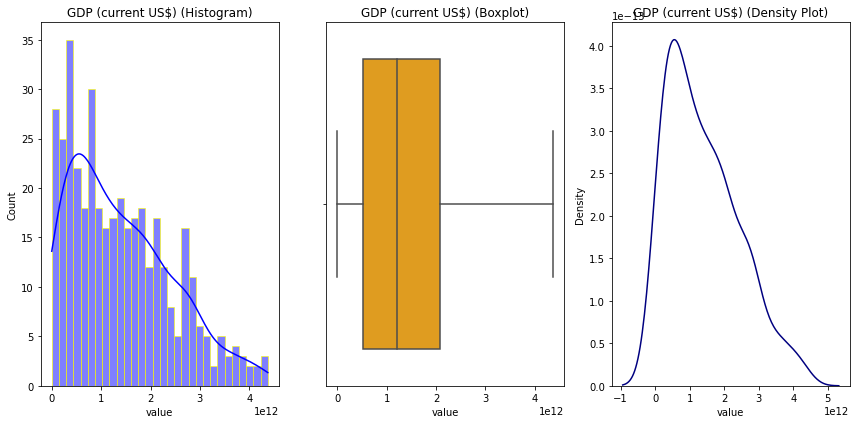

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


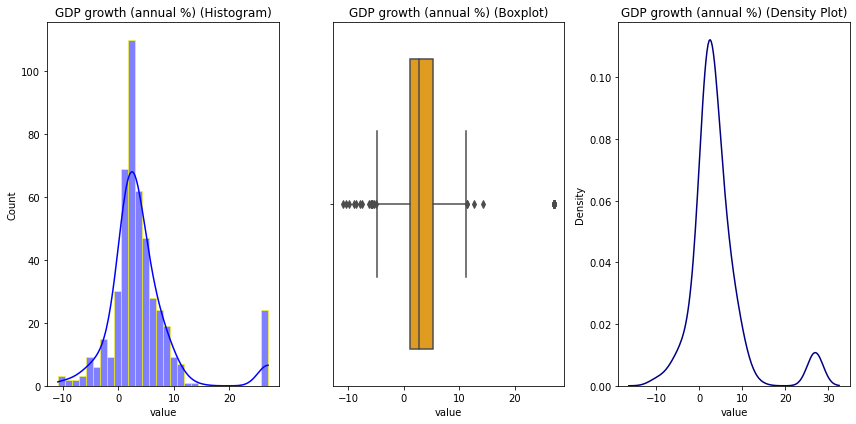

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


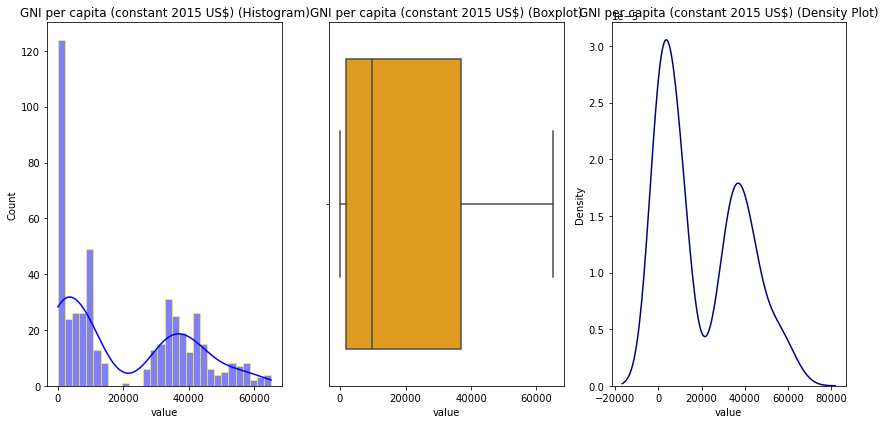

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


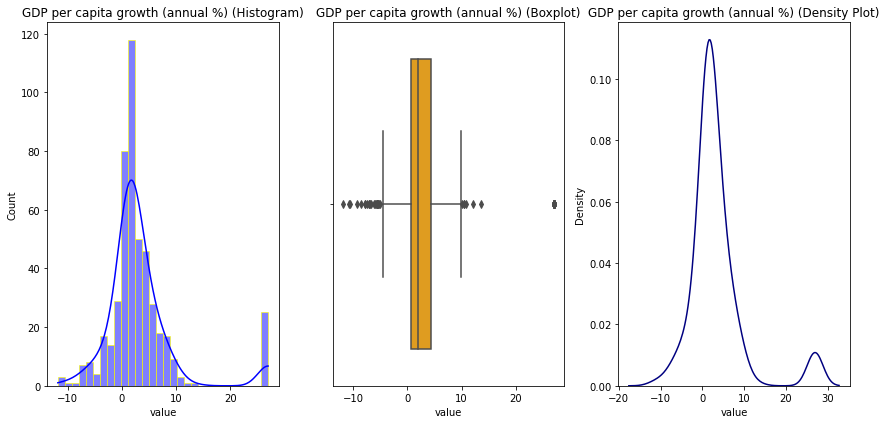

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


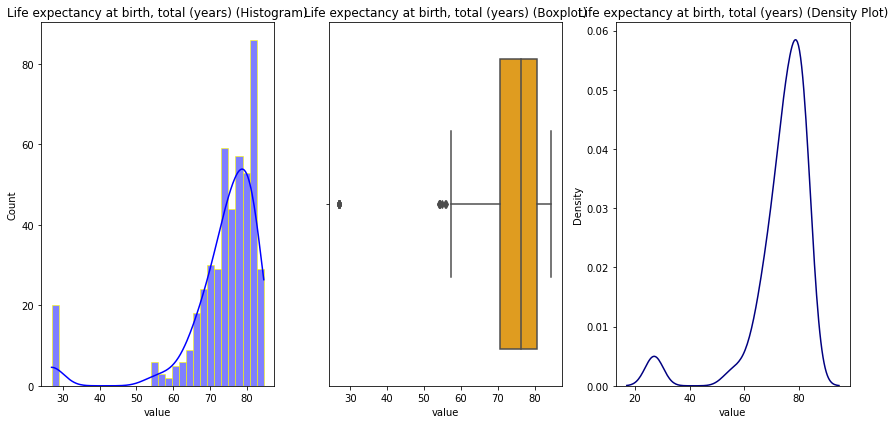

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


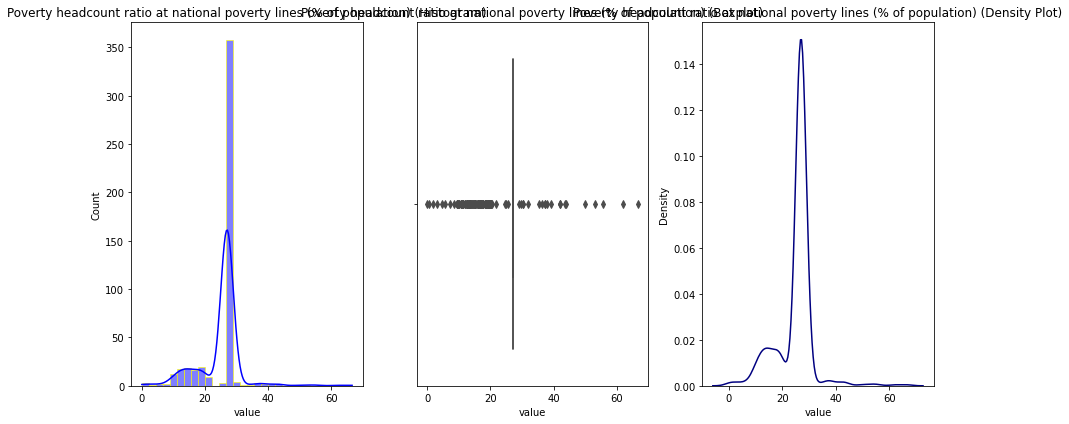

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


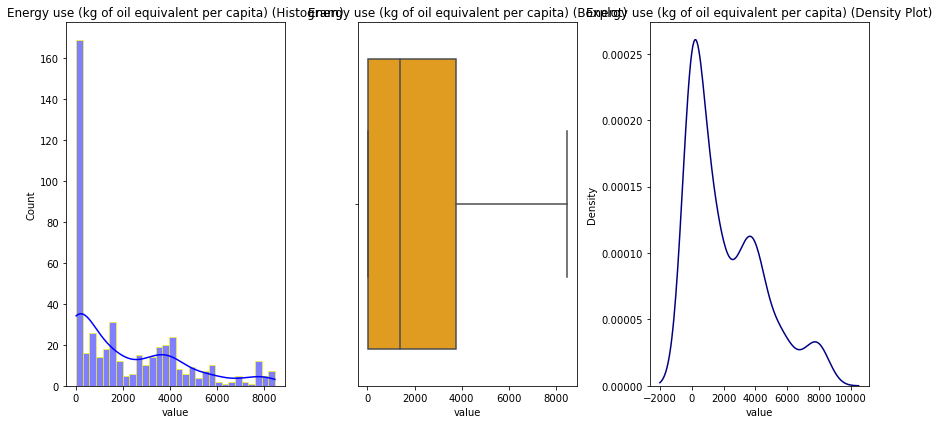

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


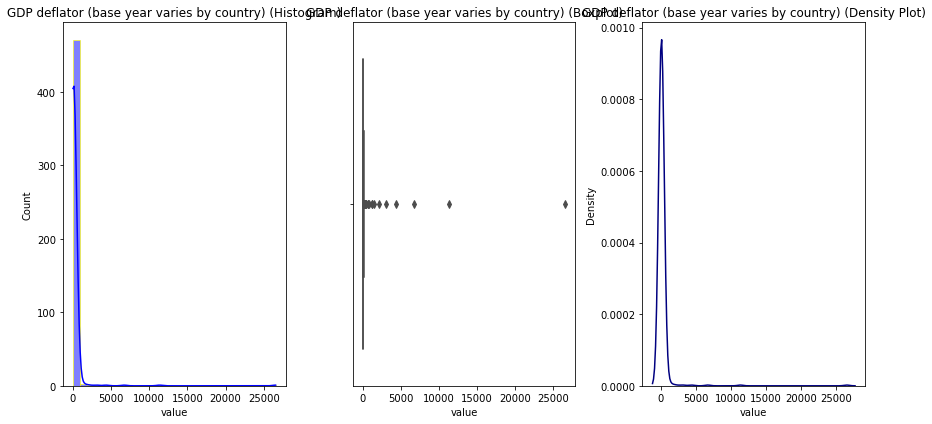

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


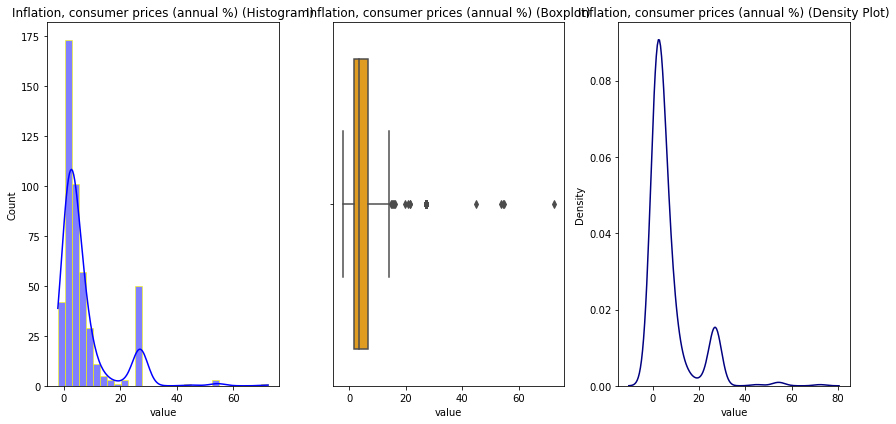

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


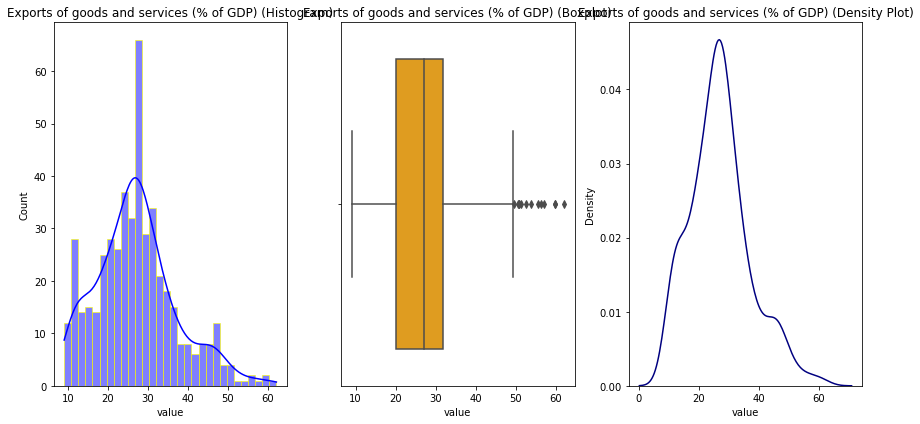

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


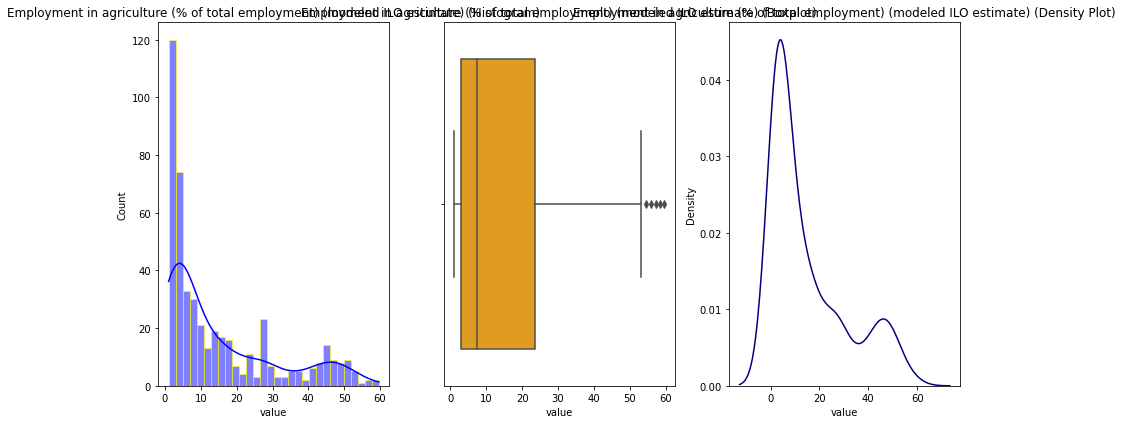

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


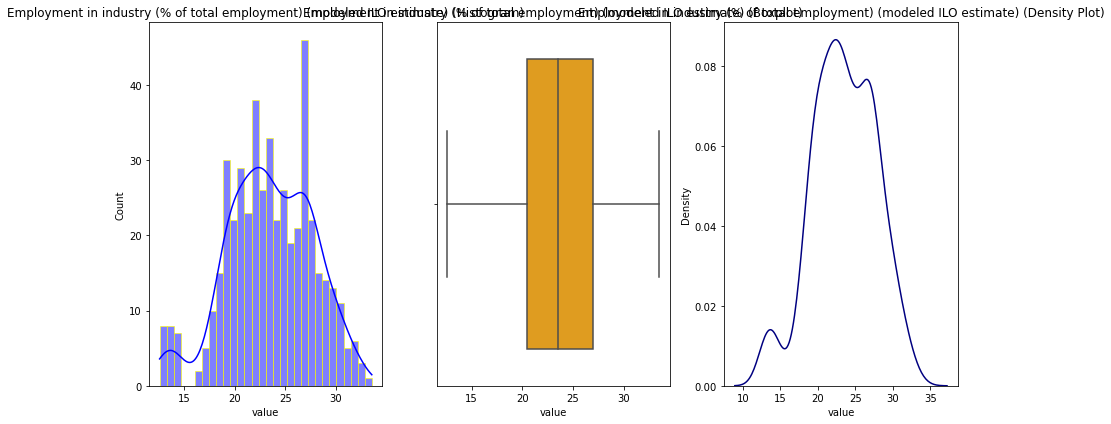

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


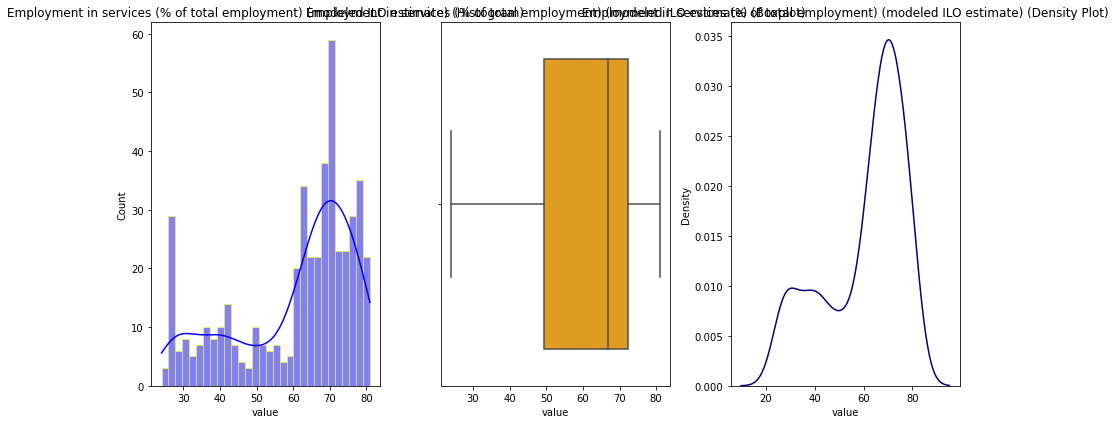

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


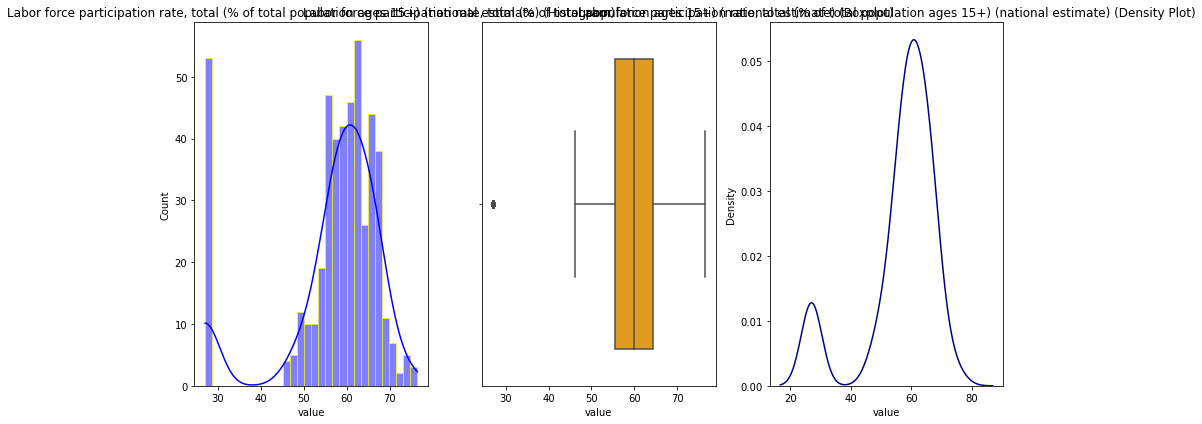

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


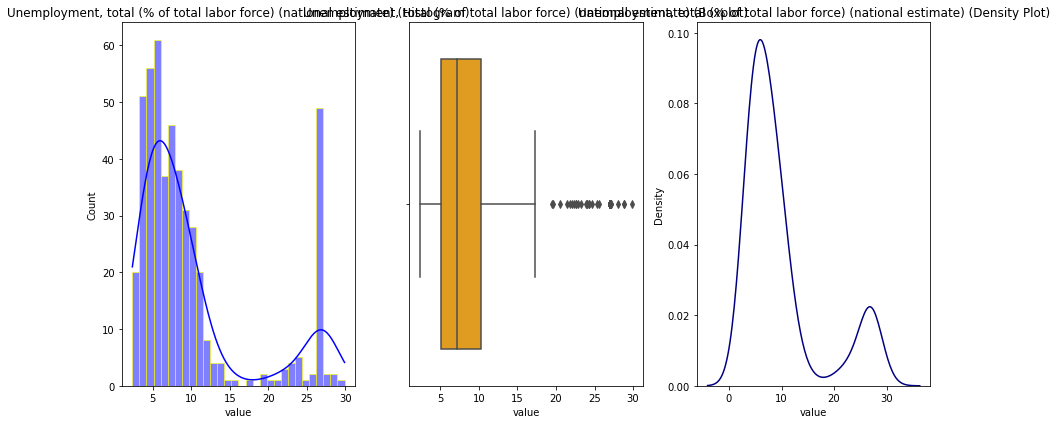

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


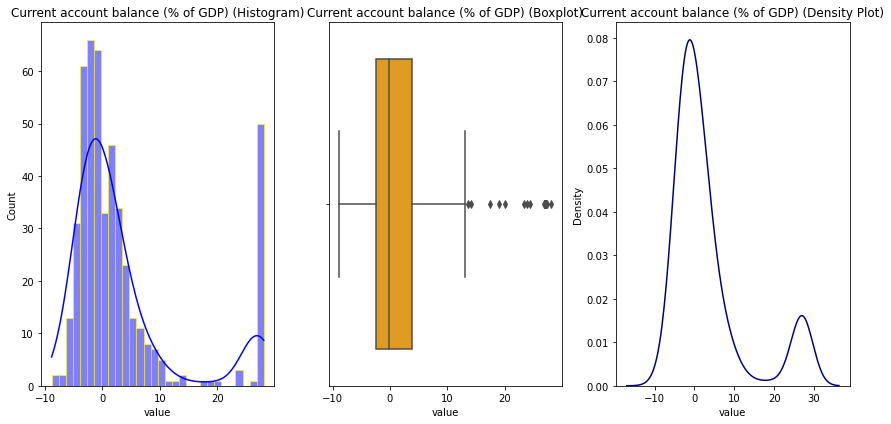

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\562407902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].str.extract('(\d{4})').astype(int)


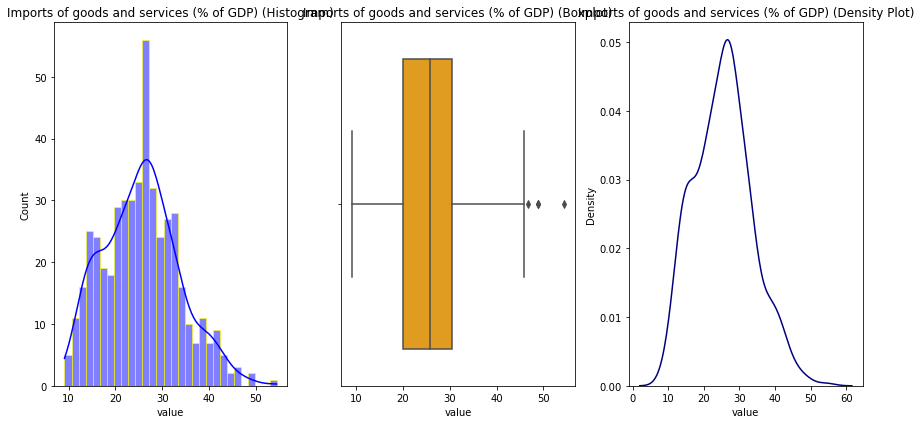

In [28]:
for i in metrics:
    df = data[data['series_name'] == i]
    df['year'] = df['year'].str.extract('(\d{4})').astype(int)

    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df['value'], bins=30, kde=True, edgecolor="yellow", color="blue")
    plt.title(f'{i} (Histogram)')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df['value'], color="orange")
    plt.title(f'{i} (Boxplot)')

    # Density Plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df['value'], color="navy")
    plt.title(f'{i} (Density Plot)')

    plt.tight_layout()
    plt.show()


# Time Series Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\3892499331.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(country_data['year'], country_data['value'], label=country)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18128\3892499331.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(country_data['year'], country_data['value'], label=country)


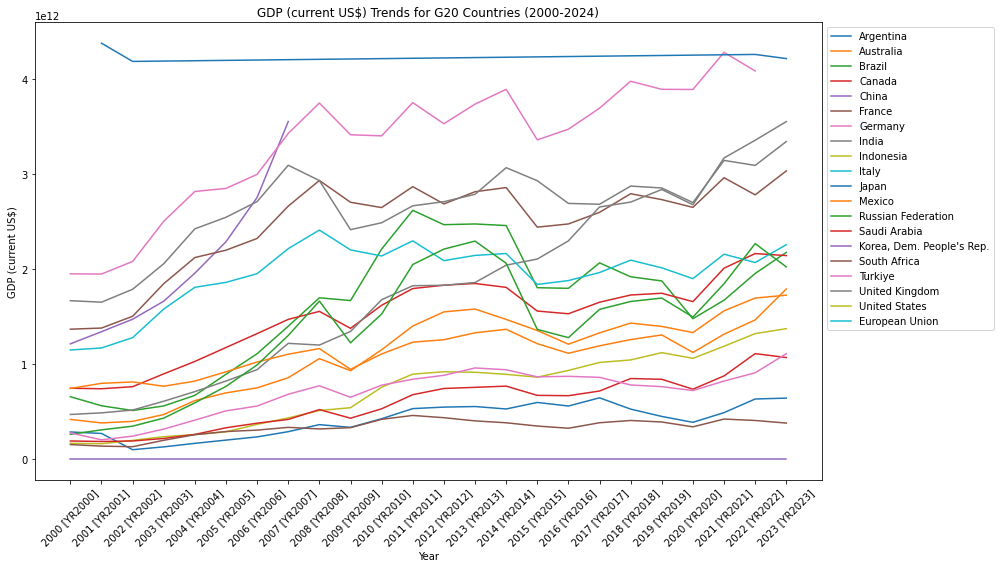

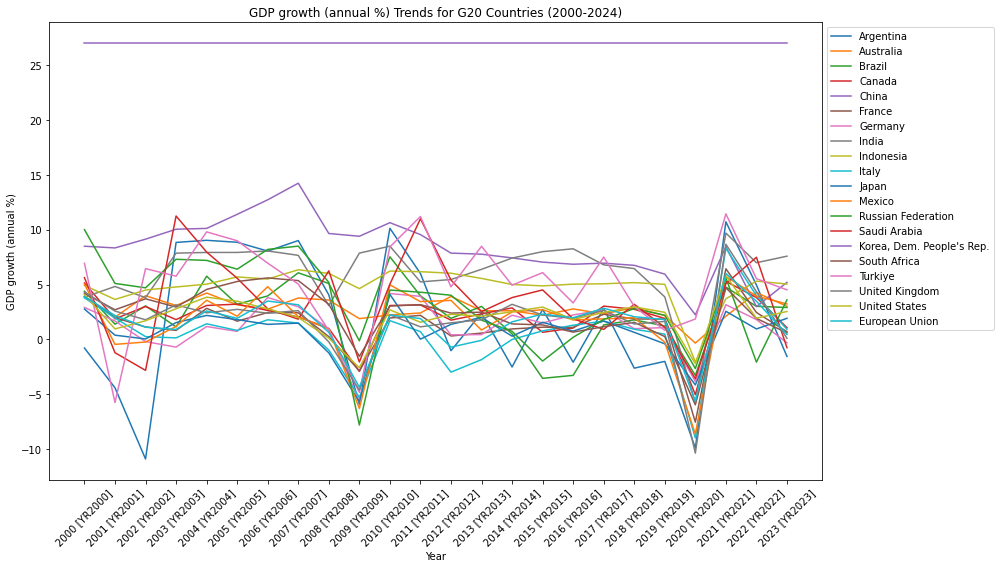

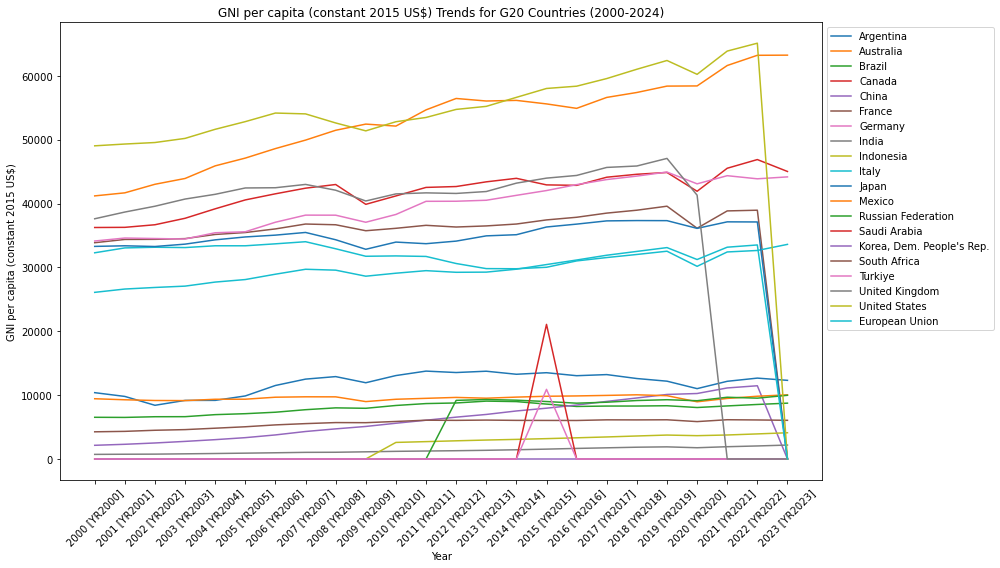

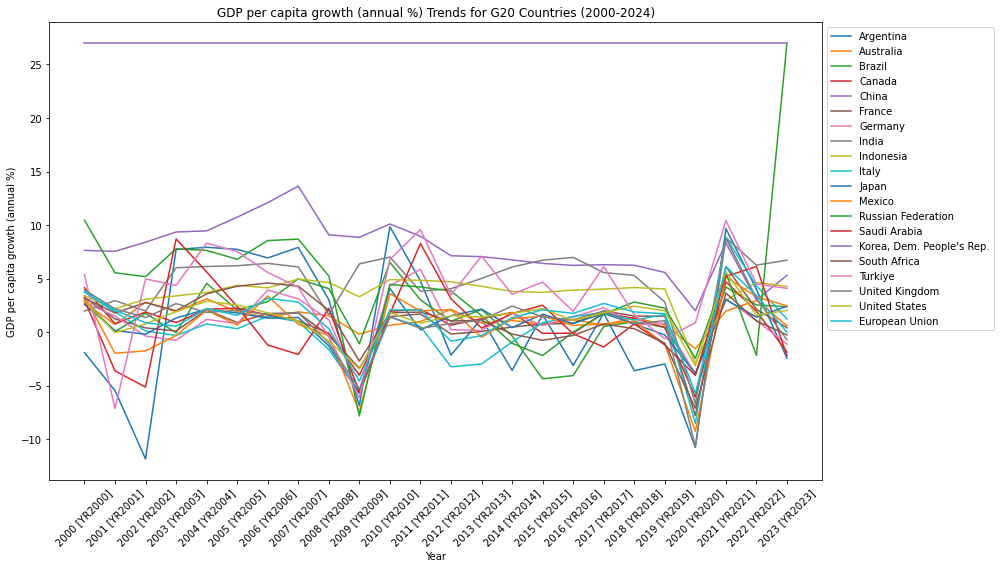

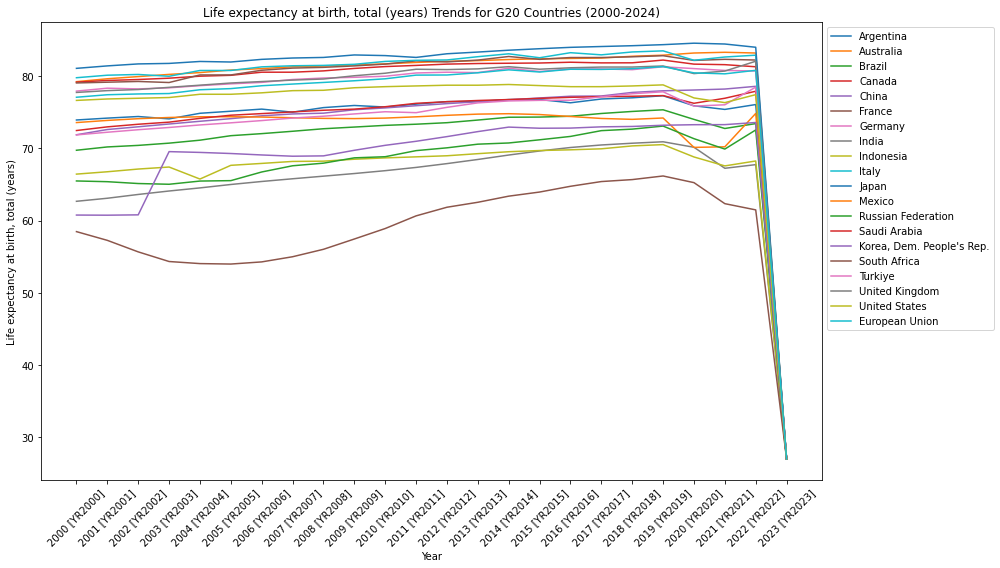

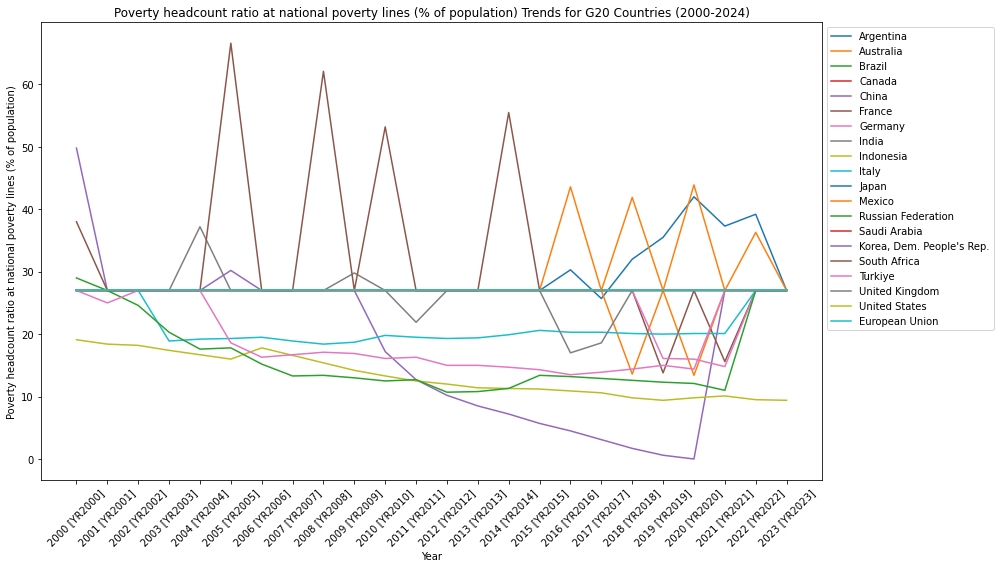

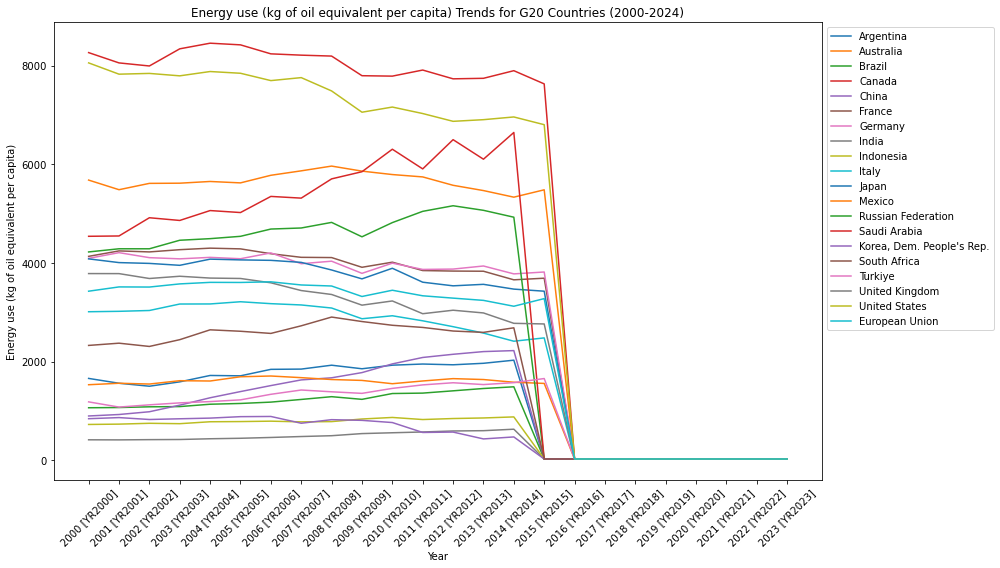

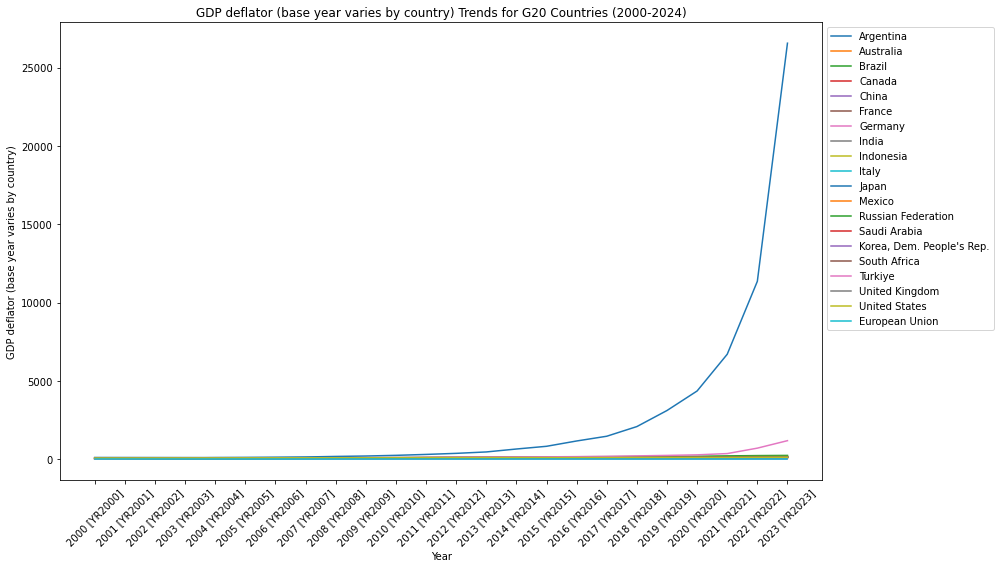

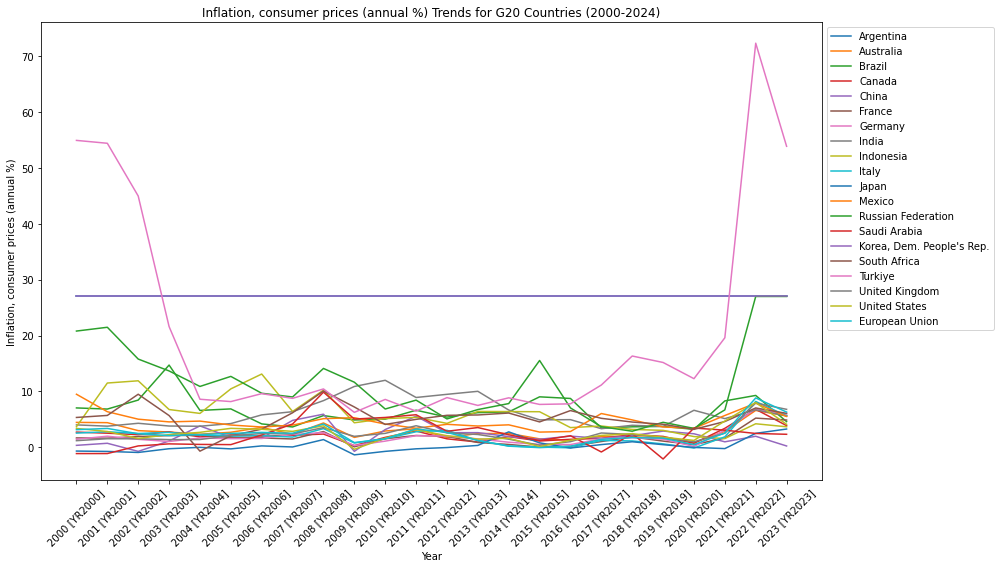

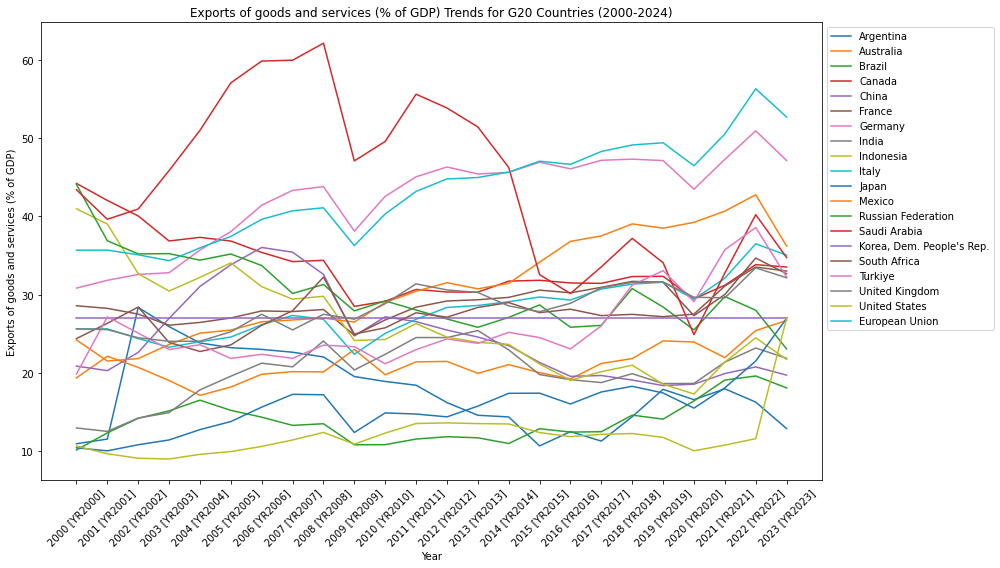

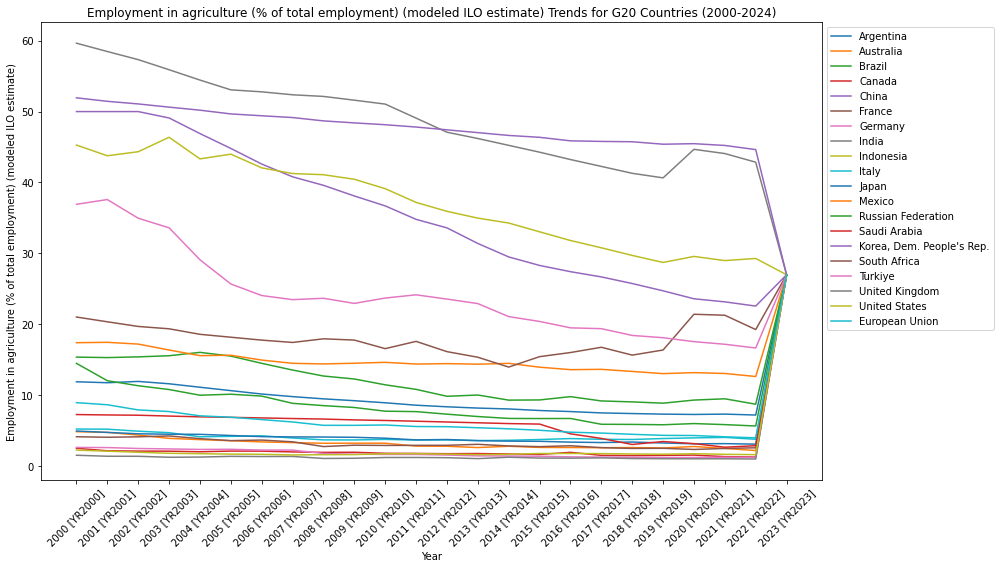

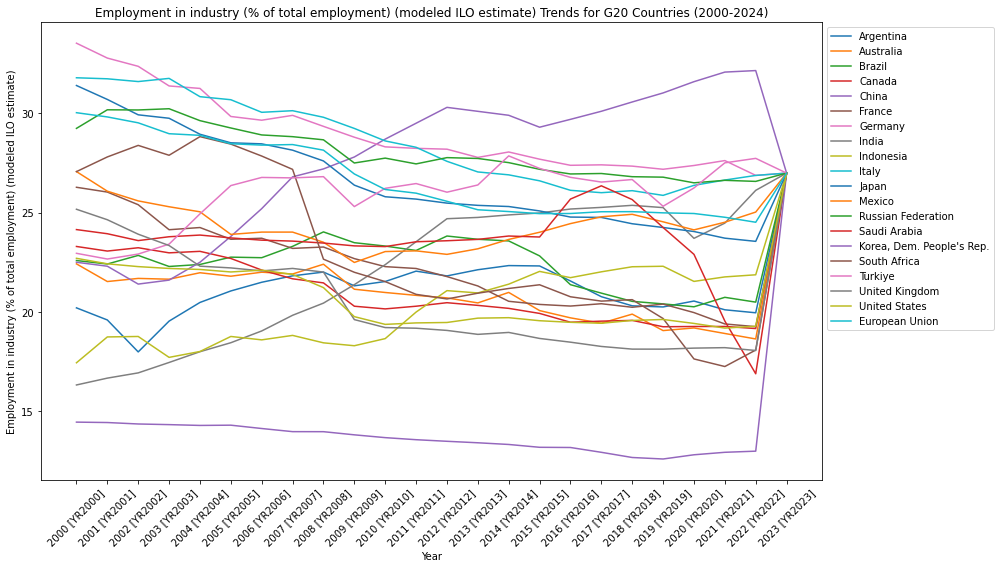

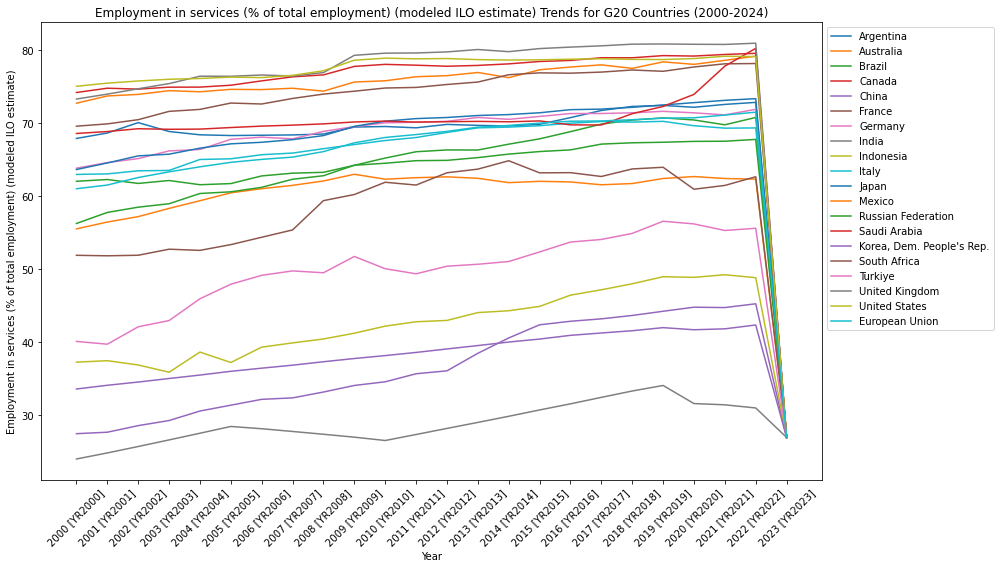

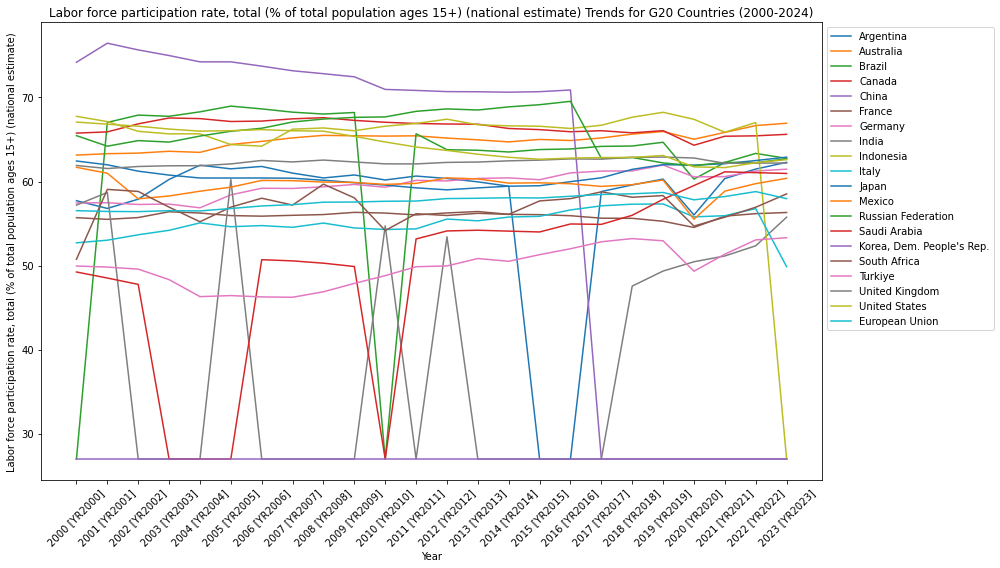

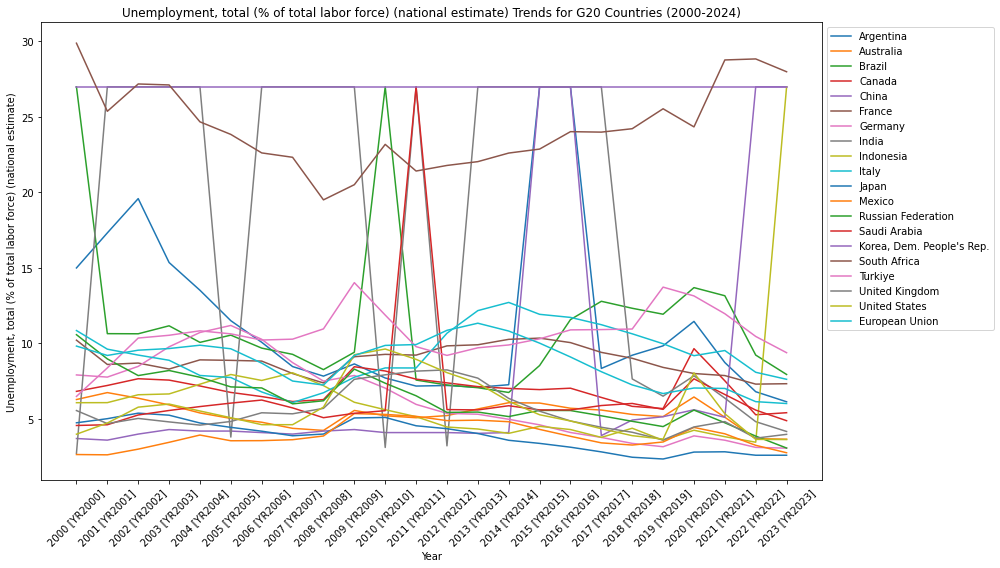

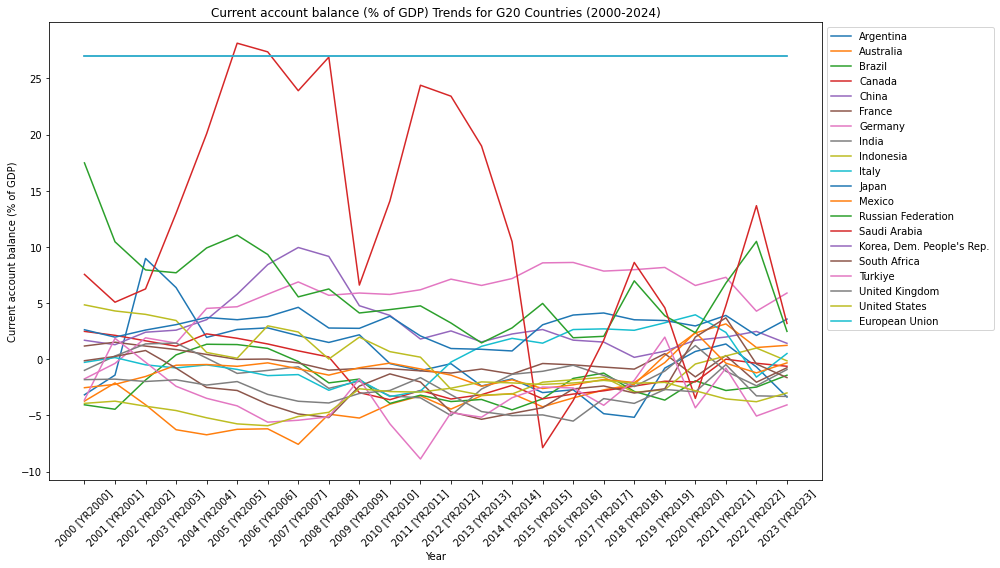

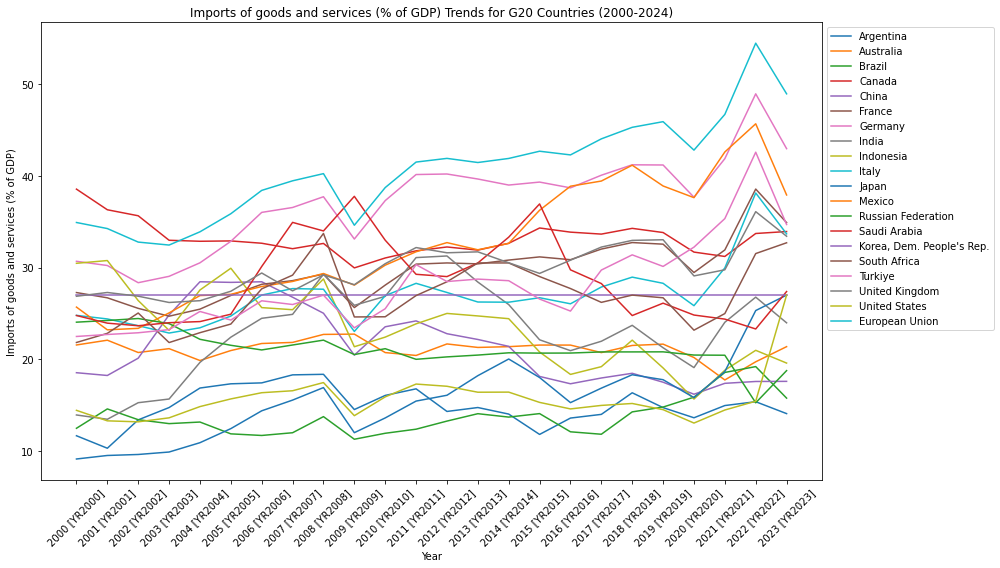

In [29]:
for metric in metrics:
    plt.figure(figsize=(14, 8))
    df = data[data.series_name == metric]
    for country in countries:
        country_data = df[df['country'] == country]
        plt.plot(country_data['year'], country_data['value'], label=country)

    plt.title(f'{metric} Trends for G20 Countries (2000-2024)')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Country level comparison, developing vs developed nations

In [30]:
years = list(data.year.unique())
print(years)

['2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']


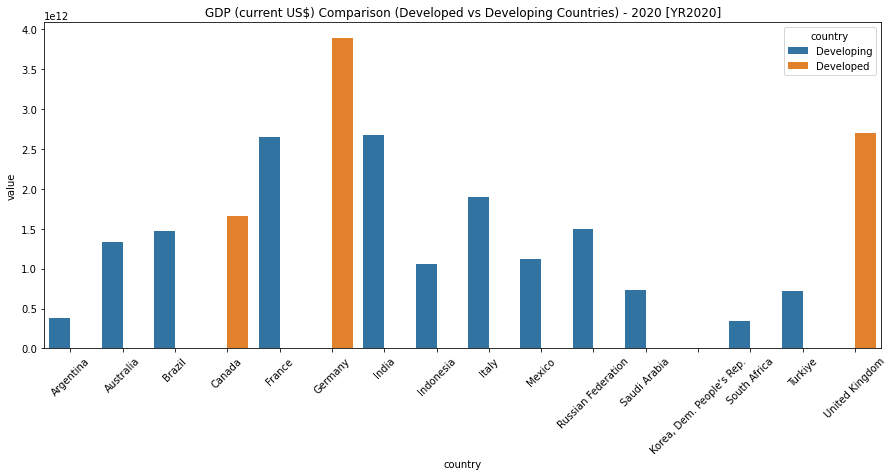

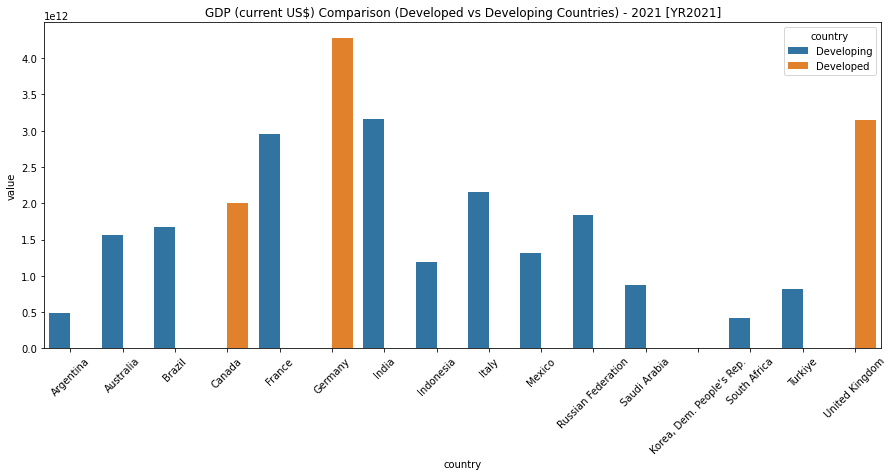

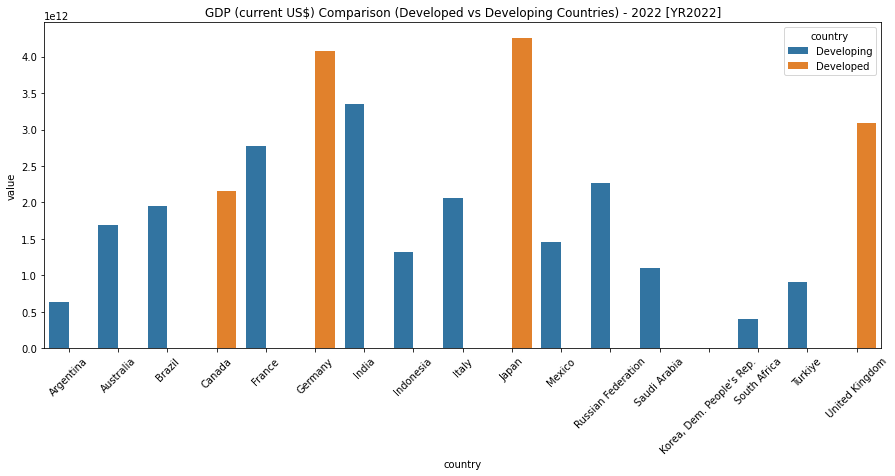

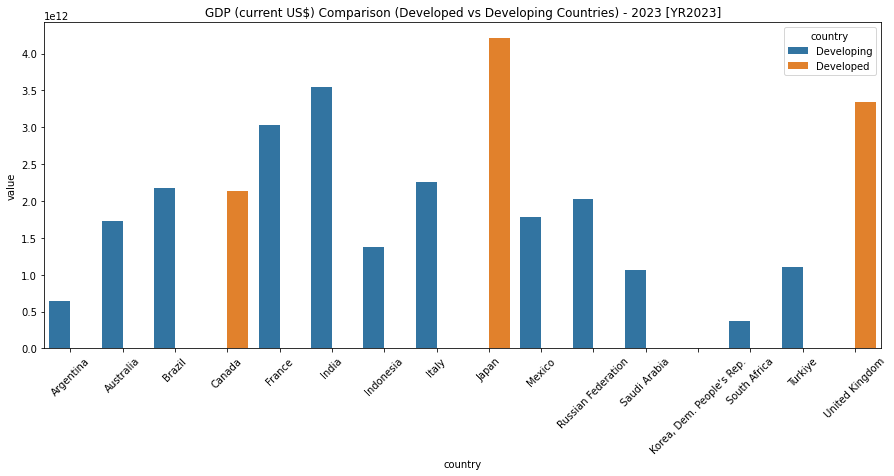

In [ ]:
# Create a list of developed and developing countries
developed_countries = ['United States', 'United Kingdom', 'Germany', 'Japan', 'Canada']
developing_countries = ['India', 'Brazil', 'China', 'Mexico', 'South Africa']

for metric in metrics:
    growth_data = data[data['series_name'] == metric]
#we will do it for the last 4 years
    for year in years[len(years)-4:]:
        df = growth_data[growth_data['year'] == year]

        plt.figure(figsize=(15, 6))
        sns.barplot(x='country', y='value', hue=df['country'].apply(lambda x: 'Developed' if x in developed_countries else 'Developing'), data=df)
        plt.title(f'{metric} Comparison (Developed vs Developing Countries) - {year}')
        plt.xticks(rotation=45)
        plt.show()


# Trend analysis

In [ ]:
# Apply rolling averages (window=5) to smooth the time series for GDP data
data['rolling_avg'] = data.groupby('country')['value'].transform(lambda x: x.rolling(window=5).mean())

# Plot rolling averages
plt.figure(figsize=(14, 8))
for country in data['country'].unique():
    country_data = data[data['country'] == country]
    plt.plot(country_data['year'], country_data['rolling_avg'], label=country)

plt.title('5-Year Rolling Average of GDP for G20 Countries')
plt.xlabel('Year')
plt.ylabel('GDP (Rolling Avg)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.series_name.unique()

# Multivariate analysis

# Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pivot_df = data.pivot_table(index=['country', 'year'], columns='series_name', values='value')

# Prepare data for clustering
clustering_data = pivot_df.dropna()  # Remove rows with missing values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
clustering_data['Cluster'] = clusters

# Visualize clusters
sns.scatterplot(x=clustering_data['GDP (current US$)'], y=clustering_data['Inflation, consumer prices (annual %)'], hue=clustering_data['Cluster'])
plt.title('K-Means Clustering of G20 Countries Based on Economic Indicators')
plt.show()


# Principal Component Analysis(PCA)

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clustering_data['Cluster'])
plt.title('PCA of G20 Countries Based on Economic Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Correlation analysis between the indicators

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=pivot_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
sns.pairplot(data=pivot_df)
plt.show()

In [ ]:
pivot_df.head()